In [1]:
%pwd

u'/Users/christophereppig/DSI_week3'

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
%matplotlib inline

In [5]:
df = pd.read_csv('~/DSI-CHI-1/lessons/week-07/1.1-intro-to-clustering/assets/datasets/iris.csv')

In [11]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


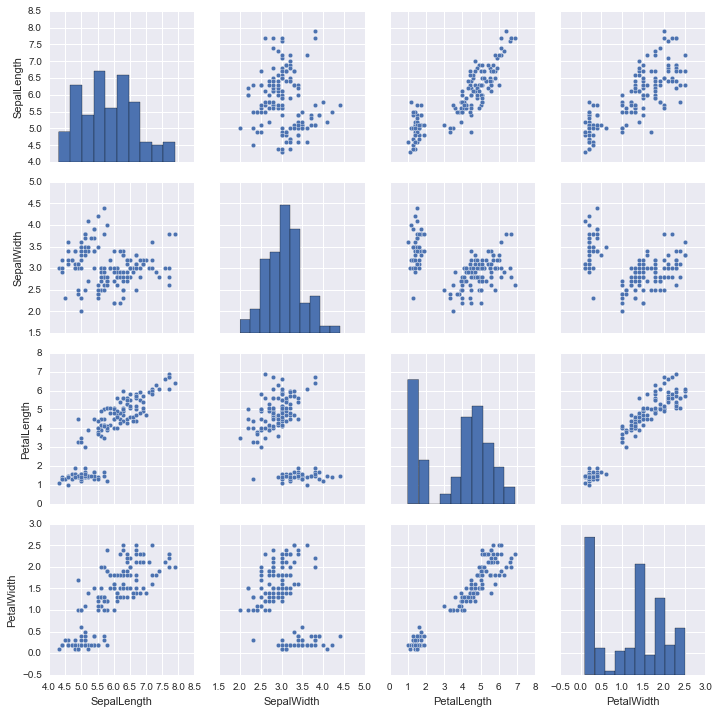

In [13]:
## prints scatterplot matrix, which can visually show us clusters
sns.pairplot(df)

In [16]:
## sets up KMeans object, using 2 clusters
kmeans = KMeans(n_clusters=2)

In [17]:
kmeans

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
## standardizes the data
standardized_features = StandardScaler().fit_transform(df.ix[:,0:4])

In [21]:
standardized_features

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [23]:
standardized_features.shape

(150, 4)

In [26]:
## just the standardized features in the first column
standardized_features[:,0]

array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
       -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
       -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
       -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
       -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
       -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
       -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
       -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
       -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
        1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
       -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
       -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
        1.03800476, -0.29484182, -0.05250608,  0.4321654 , -0.29

In [27]:
standardized_features[:,0].mean()

-4.7369515717340012e-16

In [30]:
for x in range(0,4):
    print standardized_features[:,x].mean(), '\t', standardized_features[:,x].std()

-4.73695157173e-16 	1.0
-6.63173220043e-16 	1.0
3.31586610021e-16 	1.0
-2.84217094304e-16 	1.0


In [31]:
kmeans.fit(standardized_features)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [32]:
kmeans.predict(standardized_features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [33]:
cluster_pred = kmeans.predict(standardized_features)

In [34]:
for i in cluster_pred:
    if i == 1:
        print "virginica"
    else:
        print "setosa"

virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
set

### .copy( ) copies the data frame for this new object

In [36]:
petals = df[['PetalWidth', 'PetalLength']].copy()

In [37]:
petals = petals.join(pd.DataFrame(cluster_pred, columns=['predicted_class']))

In [38]:
petals.head()

,PetalWidth,PetalLength,predicted_class
0,0.2,1.4,1
1,0.2,1.4,1
2,0.2,1.3,1
3,0.2,1.5,1
4,0.2,1.4,1


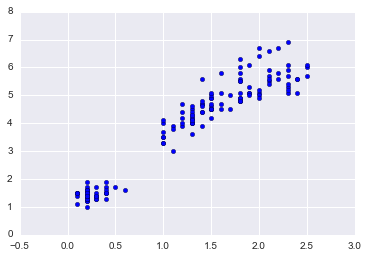

In [40]:
plt.scatter(petals['PetalWidth'], petals['PetalLength'])
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

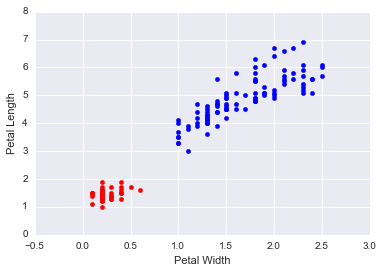

In [41]:
## makes a different data frame for each predicted class, plots them both on the same graph in different colors

class_1 = petals.loc[(petals['predicted_class'] == 1)]
class_0 = petals.loc[(petals['predicted_class'] == 0)]



plt.scatter(class_1['PetalWidth'], class_1['PetalLength'], color='red')
plt.scatter(class_0['PetalWidth'], class_0['PetalLength'], color='blue')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

In [49]:


with_labels = df.copy()


for flower, plotting_color in zip(df['Name'].unique(), ['red', 'green', 'blue']):
    print flower, plotting_color
    plotting_df = with_labels.loc[(class_0['Name'] == flower)]
    plt.scatter(class_0['PetalWidth'], class_1['PetalLength'], color=plotting_color)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

Iris-setosa red


KeyError: 'Name'

In [54]:
silhouette_score?

In [64]:
silhouette_score(standardized_features, cluster_pred, metric='euclidean')
# plt.plot(silhouette_score)
# plt.label('k')
# sns.despine()

0.58018446325739603

In [68]:
list_of_scores = []
for n in range(2,10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(standardized_features)
    predictions = kmeans.predict(standardized_features)
    list_of_scores.append((n, silhouette_score(standardized_features, predictions, metric='euclidean')))

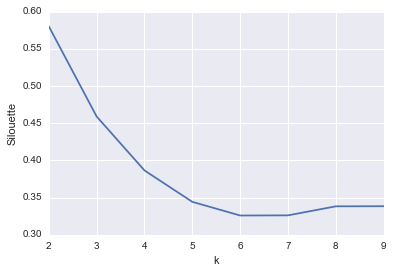

In [69]:
plt.plot([item[0] for item in list_of_scores], [item[1] for item in list_of_scores])
plt.ylabel('Silouette')
plt.xlabel("k")
sns.despine()

In [65]:
list_of_scores = []
for n in range(2,100):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(standardized_features)
    predictions = kmeans.predict(standardized_features)
    list_of_scores.append((n, silhouette_score(standardized_features, predictions, metric='euclidean')))

In [70]:
list_of_scores[0:5]

[(2, 0.58018446325739603),
 (3, 0.45897178670187172),
 (4, 0.38651176245648911),
 (5, 0.34429625631387373),
 (6, 0.32593650587300771)]

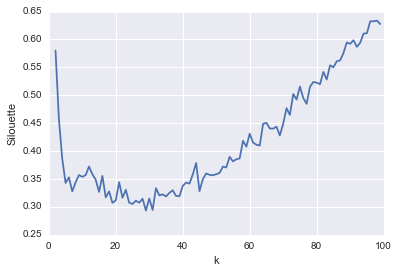

In [67]:
plt.plot([item[0] for item in list_of_scores], [item[1] for item in list_of_scores])
plt.ylabel('Silouette')
plt.xlabel("k")
sns.despine()